In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df =  pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
df.drop("customerID",axis='columns',inplace=True)

In [4]:
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [5]:
df.TotalCharges.values

array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      dtype=object)

In [6]:
df[pd.to_numeric(df.TotalCharges,errors='coerce').isnull()].shape

(11, 20)

In [7]:
df =  df[df.TotalCharges!=" "]
df.shape

(7032, 20)

In [8]:
df.TotalCharges = pd.to_numeric(df.TotalCharges)
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

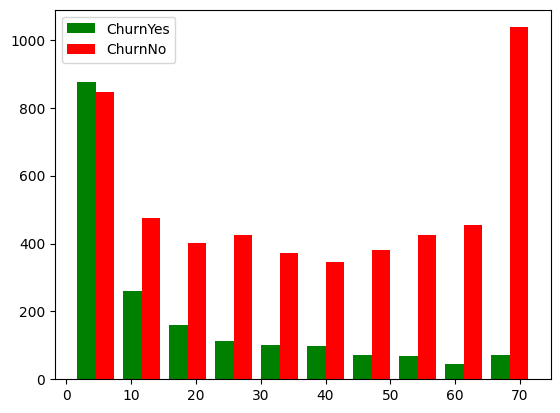

In [9]:
tenure_churn_no = df[df.Churn == "No"].tenure
tenure_churn_yes = df[df.Churn == "Yes"].tenure

plt.hist([tenure_churn_yes, tenure_churn_no], color=['green','red'], label=['ChurnYes', 'ChurnNo'])
plt.legend()

In [10]:
def print_unique_col_values(df):
    for columns in df:
        if df[columns].dtype == 'object':
            print("{0}: {1}".format(columns,df[columns].unique()))
print_unique_col_values(df)

gender: ['Female' 'Male']
Partner: ['Yes' 'No']
Dependents: ['No' 'Yes']
PhoneService: ['No' 'Yes']
MultipleLines: ['No phone service' 'No' 'Yes']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['No' 'Yes' 'No internet service']
OnlineBackup: ['Yes' 'No' 'No internet service']
DeviceProtection: ['No' 'Yes' 'No internet service']
TechSupport: ['No' 'Yes' 'No internet service']
StreamingTV: ['No' 'Yes' 'No internet service']
StreamingMovies: ['No' 'Yes' 'No internet service']
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: ['Yes' 'No']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn: ['No' 'Yes']


In [11]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [12]:
df1 = df
df1.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [13]:
df1.replace("No internet service",'No',inplace=True)
df1.replace('No phone service','No',inplace=True)
df1.sample(10)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
1995,Female,1,No,No,1,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,69.95,69.95,Yes
6838,Male,0,No,No,13,Yes,Yes,Fiber optic,No,No,No,Yes,Yes,Yes,Month-to-month,Yes,Mailed check,99.00,1301.70,Yes
1533,Female,0,No,No,14,Yes,No,Fiber optic,No,No,Yes,No,No,No,Month-to-month,No,Electronic check,75.35,1025.95,Yes
149,Male,0,Yes,Yes,15,Yes,No,DSL,No,Yes,Yes,Yes,No,Yes,Month-to-month,Yes,Mailed check,69.50,1071.40,No
4103,Male,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,No,Yes,No,No,Yes,Two year,Yes,Credit card (automatic),90.80,6511.80,No
5318,Female,0,Yes,Yes,32,Yes,No,DSL,Yes,Yes,Yes,Yes,No,Yes,Two year,No,Mailed check,73.60,2316.85,No
2534,Male,0,Yes,No,69,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,No,Yes,One year,Yes,Credit card (automatic),107.20,7317.10,No
3243,Female,0,No,No,19,No,No,DSL,No,Yes,No,No,No,Yes,Month-to-month,Yes,Electronic check,39.70,710.05,No
2946,Female,0,Yes,Yes,51,Yes,Yes,Fiber optic,No,No,No,Yes,No,No,Month-to-month,Yes,Electronic check,80.75,4116.90,No
2786,Male,0,No,Yes,27,Yes,No,DSL,Yes,Yes,No,No,No,No,One year,No,Mailed check,56.20,1567.55,No


In [14]:
print_unique_col_values(df1)

gender: ['Female' 'Male']
Partner: ['Yes' 'No']
Dependents: ['No' 'Yes']
PhoneService: ['No' 'Yes']
MultipleLines: ['No' 'Yes']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['No' 'Yes']
OnlineBackup: ['Yes' 'No']
DeviceProtection: ['No' 'Yes']
TechSupport: ['No' 'Yes']
StreamingTV: ['No' 'Yes']
StreamingMovies: ['No' 'Yes']
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: ['Yes' 'No']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn: ['No' 'Yes']


In [15]:
ls_of_yes_no = ['Partner','Dependents','PhoneService','MultipleLines','OnlineSecurity','OnlineBackup',
'DeviceProtection',
'TechSupport',
'StreamingTV',
'StreamingMovies','PaperlessBilling','Churn']

for col in ls_of_yes_no:
    df1[col].replace({'Yes':1,'No':0},inplace=True)

In [16]:
df1.sample(10)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
2152,Female,0,0,0,1,1,1,DSL,0,0,0,0,0,0,Month-to-month,1,Electronic check,50.10,50.10,0
4410,Female,0,1,0,16,1,0,Fiber optic,0,1,0,0,1,1,Month-to-month,1,Bank transfer (automatic),94.65,1461.15,0
245,Male,1,0,0,4,1,0,Fiber optic,1,0,0,0,0,0,Month-to-month,0,Electronic check,75.35,273.40,0
2065,Female,0,0,0,34,1,1,Fiber optic,0,0,0,0,1,0,Month-to-month,0,Electronic check,85.35,2896.60,0
2651,Male,0,0,0,24,1,0,Fiber optic,0,0,0,0,1,1,Month-to-month,1,Electronic check,90.35,2238.50,1
4621,Female,0,0,0,6,1,0,DSL,1,0,0,0,0,0,Month-to-month,1,Electronic check,49.45,314.60,0
3291,Female,0,1,1,24,1,0,DSL,1,0,0,1,0,0,Month-to-month,0,Electronic check,55.15,1319.85,0
788,Female,0,1,1,24,1,1,DSL,1,1,0,0,1,1,One year,0,Electronic check,78.40,1832.40,0
2965,Male,0,0,0,51,1,1,Fiber optic,0,0,1,0,0,0,Month-to-month,0,Credit card (automatic),80.00,4242.35,1
4499,Female,0,0,1,12,1,1,Fiber optic,1,0,0,0,0,0,Month-to-month,1,Electronic check,78.30,909.25,1


In [17]:
df1['gender'].replace({'Female':1,'Male':0},inplace=True)

In [18]:
df1['gender'].unique()

array([1, 0], dtype=int64)

In [19]:
print_unique_col_values(df1)

InternetService: ['DSL' 'Fiber optic' 'No']
Contract: ['Month-to-month' 'One year' 'Two year']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']


In [20]:
df2 = pd.get_dummies(data=df1, columns = ['InternetService','Contract','PaymentMethod'])
df2.sample(5)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
1945,1,0,1,1,71,1,0,0,0,0,...,0,0,1,0,0,1,1,0,0,0
2252,1,0,1,1,64,1,0,0,0,0,...,0,0,1,0,1,0,1,0,0,0
5071,0,0,1,0,1,1,0,0,0,1,...,0,1,0,1,0,0,0,1,0,0
3320,0,1,1,0,18,1,0,1,0,0,...,1,0,0,1,0,0,0,1,0,0
4337,1,1,0,0,71,1,1,0,1,0,...,0,1,0,1,0,0,0,1,0,0


In [21]:
df2.dtypes

gender                                       int64
SeniorCitizen                                int64
Partner                                      int64
Dependents                                   int64
tenure                                       int64
PhoneService                                 int64
MultipleLines                                int64
OnlineSecurity                               int64
OnlineBackup                                 int64
DeviceProtection                             int64
TechSupport                                  int64
StreamingTV                                  int64
StreamingMovies                              int64
PaperlessBilling                             int64
MonthlyCharges                             float64
TotalCharges                               float64
Churn                                        int64
InternetService_DSL                          uint8
InternetService_Fiber optic                  uint8
InternetService_No             

In [22]:
have_to_scale = ['tenure','MonthlyCharges','TotalCharges']
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df2[have_to_scale] = scaler.fit_transform(df2[have_to_scale])

In [23]:
df2.sample(3)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
1339,0,0,1,0,0.915493,1,1,0,1,1,...,0,1,0,1,0,0,0,1,0,0
6559,1,0,1,0,0.774648,1,0,0,0,1,...,0,1,0,1,0,0,0,0,1,0
2316,0,0,0,0,0.042254,1,0,0,0,0,...,0,0,1,1,0,0,0,0,0,1


In [24]:
x = df2.drop('Churn',axis='columns')
y = df2['Churn']

In [25]:
y.head(5)

0    0
1    0
2    1
3    0
4    1
Name: Churn, dtype: int64

In [26]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=5)

In [27]:
print(x_train.shape, x_test.shape)

(5625, 26) (1407, 26)


In [28]:
import tensorflow as tf
from tensorflow import keras

print(tf.config.list_physical_devices())

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'), PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [32]:
tf.test.gpu_device_name()

'/device:GPU:0'

In [37]:



model = keras.Sequential([
    keras.layers.Dense(26, input_shape=(26,),activation ='relu'),
    keras.layers.Dense(15,activation ='relu'),
    keras.layers.Dense(10,activation ='relu'),
    keras.layers.Dense(5,activation ='relu'),
    keras.layers.Dense(2,activation ='relu'),
    keras.layers.Dense(1,activation ='sigmoid'),
])

model.compile(optimizer="adam",loss='binary_crossentropy',metrics=['accuracy'])
model.fit(x_train,y_train,epochs=100)

Epoch 1/100
176/176 [==============================] - 1s 4ms/step - loss: 0.5072 - accuracy: 0.7403
Epoch 2/100
176/176 [==============================] - 1s 4ms/step - loss: 0.4405 - accuracy: 0.7829
Epoch 3/100
176/176 [==============================] - 1s 4ms/step - loss: 0.4319 - accuracy: 0.7911
Epoch 4/100
176/176 [==============================] - 1s 4ms/step - loss: 0.4270 - accuracy: 0.8004
Epoch 5/100
176/176 [==============================] - 1s 3ms/step - loss: 0.4227 - accuracy: 0.8011
Epoch 6/100
176/176 [==============================] - 1s 3ms/step - loss: 0.4207 - accuracy: 0.8018
Epoch 7/100
176/176 [==============================] - 1s 3ms/step - loss: 0.4167 - accuracy: 0.8064
Epoch 8/100
176/176 [==============================] - 1s 3ms/step - loss: 0.4138 - accuracy: 0.8075
Epoch 9/100
176/176 [==============================] - 0s 3ms/step - loss: 0.4115 - accuracy: 0.8071
Epoch 10/100
176/176 [==============================] - 0s 3ms/step - loss: 0.4089 - accura